### Creation of the Multi - Linear Regression Code 

In [ ]:
# Import lib. needed

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Creation of the Raw Data Set

x = np.array([
  [1200,1],
  [1300,3],
  [1500,5],
  [1600,2]
])                                 # Area sqft , Bedroom Number

y = np.array([330, 370, 400, 320]) #Money in thousands

In [42]:
# 2. Normalize the Features

mean = np.mean(x,axis=0)
std = np.std(x,axis=0)

x = (x-mean)/std

In [ ]:
# 3. Add bias columns (for intercept term)

x_norm  = np.c_[np.ones(x.shape[0]),x]
# print(x_norm)

In [ ]:
# 4 Intisialze the Weights

weight = np.zeros(x_norm.shape[1])
# print(weight)

In [ ]:
# 4. Prediction Function

def predict (x, weight):
  return np.dot(x, weight)

In [46]:
# 5. Cost Function Formation

def cost_function(x,y,weight):
  y_pred = predict(x,weight)
  error = y - y_pred
  return np.mean(error ** 2)

In [ ]:
# 6. Gradient_Descent Function
def gd (x, y, weight , lr =0.1, iteration =100):

  # Get the lenght of the 'y' values
  lenght=len(y)
  cost_list =[]


  #Iterate to make the better model each time
  for i in range(iteration):
    y_pred = predict(x,weight)
    error = y - y_pred
    gradient = (-2/lenght) * np.dot(x.T,error)
    weight  = weight - lr  * gradient

    if i % 10 == 0:
      Cost = cost_function(x,y,weight)
      cost_list.append(Cost)
      print(f"Iteration {i}' value of Cost : {round(Cost,10)}" )
  

  return weight,cost_list,y_pred
weights,cost_list,y_pred = gd(x_norm,y,weight)

Iteration 0' value of Cost : 81366.7
Iteration 10' value of Cost : 977.4005393106
Iteration 20' value of Cost : 14.9580622242
Iteration 30' value of Cost : 0.5757598183
Iteration 40' value of Cost : 0.1208995012
Iteration 50' value of Cost : 0.0902473437
Iteration 60' value of Cost : 0.0876605157
Iteration 70' value of Cost : 0.0874343665
Iteration 80' value of Cost : 0.0874145017
Iteration 90' value of Cost : 0.0874127557


### Creating the Graph for the Show casing the cost function and Graphical represetation how the predcition keep getting better each time of iteration 

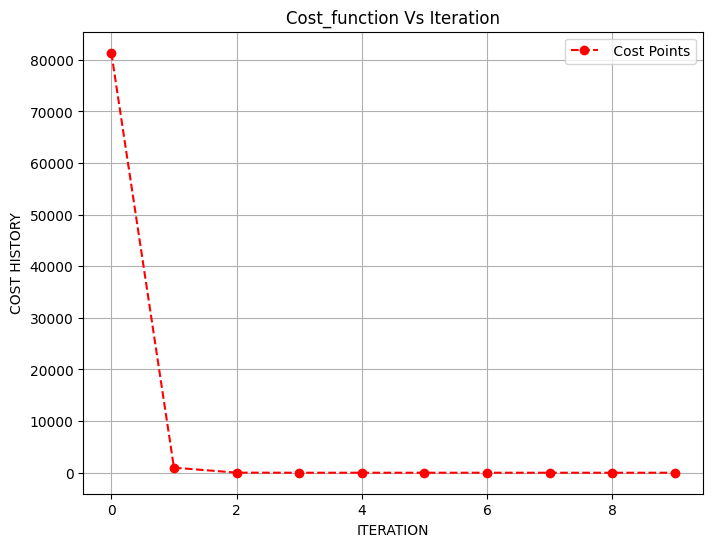

In [ ]:
# Graph for Cost History

plt.figure(figsize=(8,6))
plt.plot(range(len(cost_list)),cost_list,color = 'red', label =' Cost Points', marker ='o',linestyle  ='--')
plt.xlabel('ITERATION')
plt.ylabel('COST HISTORY')
plt.legend()
plt.grid()
plt.title("Cost_function Vs Iteration")
plt.show()

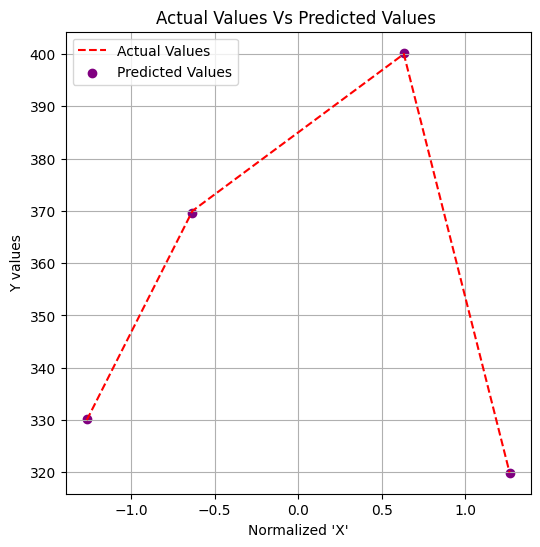

In [70]:
# Graph for the Predicted Values Vs Actual values

plt.figure(figsize=(6,6))
plt.plot(x[:,0],y,label= 'Actual Values', color ='Red',linestyle ='--')
plt.scatter(x[:,0],y_pred , label= 'Predicted Values', color ='purple')
plt.xlabel("Normalized 'X'")
plt.ylabel('Y values')
plt.legend()
plt.grid()
plt.title("Actual Values Vs Predicted Values ")
plt.show()